<a href="https://colab.research.google.com/github/luis-huacho/INF648-Proy-Curso-2024-01/blob/graficos-data/Graficos_Steel_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de la información de Steel Industry Energy Consumption

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
!wget https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/graficos-data/Steel_industry_data.csv

--2024-06-13 06:29:05--  https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/graficos-data/Steel_industry_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731389 (2.6M) [text/plain]
Saving to: ‘Steel_industry_data.csv.3’

Steel_industry_data 100%[===================>]   2.60M  --.-KB/s    in 0.05s   

2024-06-13 06:29:05 (52.4 MB/s) - ‘Steel_industry_data.csv.3’ saved [2731389/2731389]



In [30]:
datos_acero = pd.read_csv("/content/Steel_industry_data.csv")
datos_acero.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [31]:
print(">>> Se cuenta el número de datos:")
print(datos_acero.shape)
print("")
print(">>> Se presenta el tipo de variables:")
print(datos_acero.dtypes)
print("")
print(">>> Se genera el número de variables missing:")
print(datos_acero.isna().sum())
print("")
print(">>> Se genera el porcentaje de variables únicas:")
print(datos_acero.nunique() / len(datos_acero))

>>> Se cuenta el número de datos:
(35040, 11)

>>> Se presenta el tipo de variables:
date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

>>> Se genera el número de variables missing:
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                             

In [32]:
# Generamos una tabla de estadísticos descriptivos ordenadas por la desviación estandar
datos_acero.describe().T.round(2).sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
NSM,35040.0,42750.00,24940.53,0.0,21375.00,42750.00,64125.00,85500.00
Usage_kWh,35040.0,27.39,33.44,0.0,3.20,4.57,51.24,157.18
Leading_Current_Power_Factor,35040.0,84.37,30.46,0.0,99.70,100.00,100.00,100.00
Lagging_Current_Power_Factor,35040.0,80.58,18.92,0.0,63.32,87.96,99.02,100.00
Lagging_Current_Reactive.Power_kVarh,35040.0,13.04,16.31,0.0,2.30,5.00,22.64,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.87,7.42,0.0,0.00,0.00,2.09,27.76
CO2(tCO2),35040.0,0.01,0.02,0.0,0.00,0.00,0.02,0.07


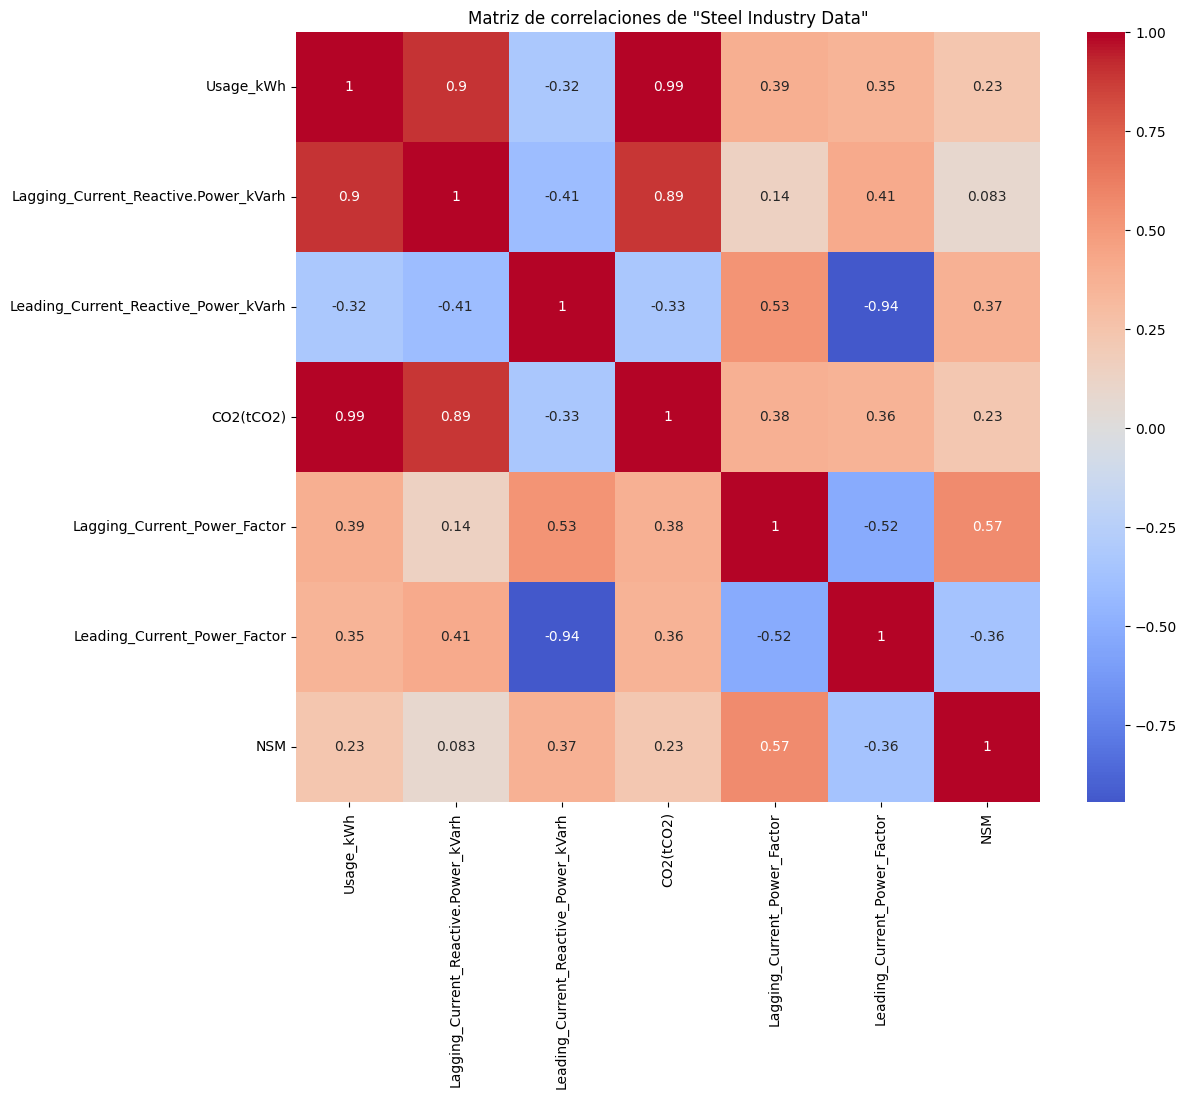

In [33]:
# Para calcular la matriz de correlacion primero se retiran los valores no numéricos
columnas_numero = datos_acero.select_dtypes(include=['float64', 'int64']).columns
datos_acero_numeric = datos_acero[columnas_numero]

# Se calcula la matriz de correlaciones
correlation_matrix = datos_acero_numeric.corr()

# Se dibuja la matriz de correlaciones en un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlaciones de "Steel Industry Data"')
plt.show()

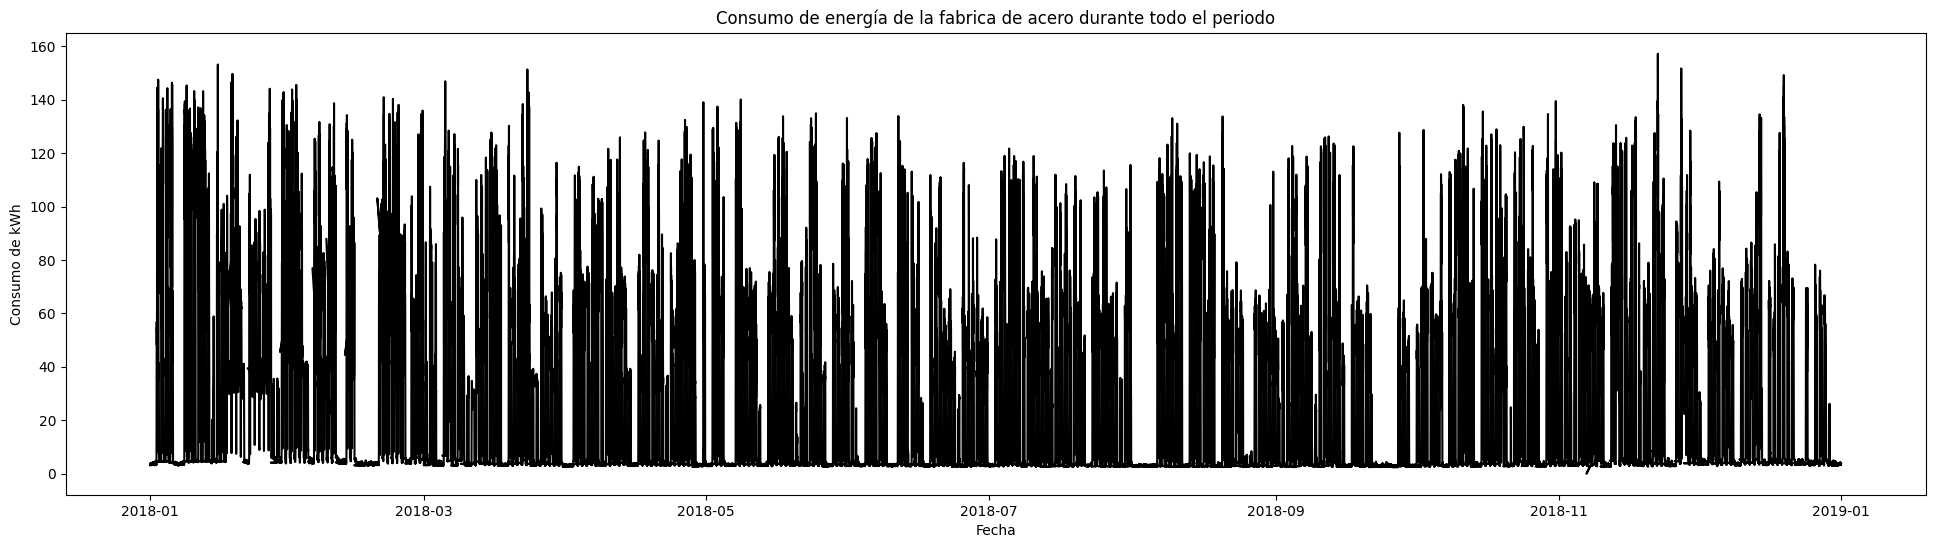

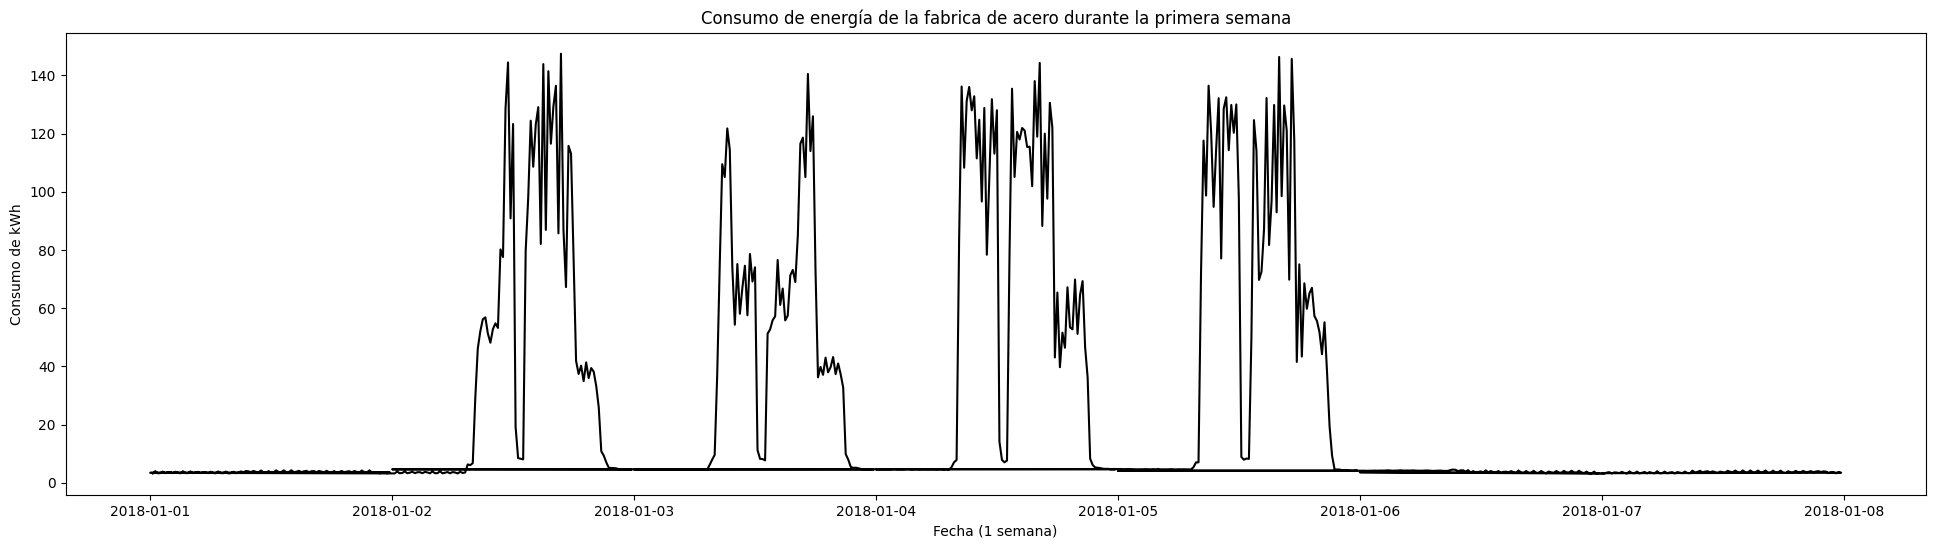

In [35]:
# Generar una nueva variable y convertir la columna fecha (date) en formato datetime
datos_acero_grafico = datos_acero.copy()
datos_acero_grafico['date'] = pd.to_datetime(datos_acero['date'], format='%d/%m/%Y %H:%M')

# Establecer que la columna fecha (date) sea un índice
datos_acero_grafico.set_index('date', inplace=True)

# Grafico para el periodo entero
plt.figure(figsize=(24, 6))
plt.plot(datos_acero_grafico['Usage_kWh'], color='black')
plt.title('Consumo de energía de la fabrica de acero durante todo el periodo')
plt.xlabel('Fecha')
plt.ylabel('Consumo de kWh')
plt.show()

# Grafico para la primera semana
semana_uno = datos_acero_grafico.loc['2018-01-01':'2018-01-07']

plt.figure(figsize=(24, 6))
plt.plot(semana_uno['Usage_kWh'], color='black')
plt.title('Consumo de energía de la fabrica de acero durante la primera semana')
plt.xlabel('Fecha (1 semana)')
plt.ylabel('Consumo de kWh')
plt.show()